# Simplex Projection of Climate/Vegetation

Sugihara & May 1990: https://www.nature.com/articles/344734a0

https://sugiharalab.github.io/EDM_Documentation/edm_functions/#simplex

In [6]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import itertools

In [54]:
EA_TS_DIR = '/home/rgreen/DroughtEDM/Data/EA_TS_16/Final/'
EA_TS_DIR_ANOM = '/home/rgreen/DroughtEDM/Data/EA_TS_16/Final_Anomaly/'

In [90]:
def simplex_error(in_dir, file, var1, var2, train, test):
    '''
    This function computes the simplex prediction skill for a combination of embedding dimensions and prediction intervals for a given land cover and environmental variable
    The result is a nested list of error values that will be input into the following function to create a dataframe
    Args:
    - in_dir: input directory 
    - file: filename (string)
    - var1: training variable (string)
    - var2: testing variable (string) (often training and testing the same)
    - train: portion of data library used to train (string of range with space between values)
    - test: portion of data libary used to test (string of range with space between values) 
    
    '''
    
    
    #param_range = list(itertools.product(list(range(1,11)), repeat = 2)) #combination of pairs with repeat values
    param_range = list(itertools.product(list(range(1,19)), repeat = 2))[:180] #cut off at 180 because we are only interested in the first 10 embedding dimensions but 18 dekads forward 
    output = []
   
    for i in param_range:  
        simplex_result = Simplex(pathIn = in_dir, dataFile = file, lib = train, pred = test, E = i[0], Tp = i[1], columns = var1, target = var2, showPlot = False)
        error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))
        MAE = list(error.values())[0]
        RMSE = list(error.values())[1]
        rho = list(error.values())[2]
        output.append(rho) #change depending on error parameter of interest
        
    return [output]
             
def simplex_error_df(error_lists):
    
    '''
    This function takes the errors values and creates a dataframe of prediction skill combinations
    Args:
    - error_list: nested list of error values from simplex combinations 
    
    '''
    
    for i in error_lists:
        chunks = np.array_split(np.array(i), 10)
        df = pd.DataFrame(np.vstack(chunks))
        
    return df
    
    

In [91]:
spx_ndvi_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
spx_ndvi_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')

spx_precip_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'P', 'P', '1 100', '101 606')
spx_precip_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'P', 'P', '1 100', '101 606')
spx_precip_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')
spx_precip_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')


spx_lst_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')
spx_lst_broadleaf_open_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')

In [42]:
# spx_ndvi_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')
# spx_ndvi_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'NDVI', 'NDVI', '1 100', '101 606')

# spx_precip_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')
# spx_precip_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'P', 'P', '1 100', '101 606')

# spx_lst_crop_irr_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_irr.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_crop_rain_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_crop_rain.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_grassland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')
# spx_lst_shrubland_rho = simplex_error(EA_TS_DIR, 'ETH.8_1_ea_grassland.csv', 'LST', 'LST', '1 100', '101 606')

In [92]:
spx_ndvi_crop_irr_rho_df = simplex_error_df(spx_ndvi_crop_irr_rho)
spx_ndvi_crop_rain_rho_df = simplex_error_df(spx_ndvi_crop_rain_rho)
spx_ndvi_grassland_rho_df = simplex_error_df(spx_ndvi_grassland_rho)
spx_ndvi_shrubland_rho_df = simplex_error_df(spx_ndvi_shrubland_rho)
spx_ndvi_broadleaf_open_rho_df = simplex_error_df(spx_ndvi_broadleaf_open_rho)

spx_precip_crop_irr_rho_df = simplex_error_df(spx_precip_crop_irr_rho)
spx_precip_crop_rain_rho_df = simplex_error_df(spx_precip_crop_rain_rho)
spx_precip_grassland_rho_df = simplex_error_df(spx_precip_grassland_rho)
spx_precip_shrubland_rho_df = simplex_error_df(spx_precip_shrubland_rho)
spx_precip_broadleaf_open_rho_df = simplex_error_df(spx_precip_broadleaf_open_rho)

spx_lst_crop_irr_rho_df = simplex_error_df(spx_lst_crop_irr_rho)
spx_lst_crop_rain_rho_df = simplex_error_df(spx_lst_crop_rain_rho)
spx_lst_grassland_rho_df = simplex_error_df(spx_lst_grassland_rho)
spx_lst_shrubland_rho_df = simplex_error_df(spx_lst_shrubland_rho)
spx_lst_broadleaf_open_rho_df = simplex_error_df(spx_lst_broadleaf_open_rho)

In [93]:
spx_lst_crop_irr_rho_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.713749,0.563135,0.446256,0.358697,0.281449,0.111648,0.040926,0.022146,0.030379,0.067338,0.121660,0.167037,0.239275,0.298227,0.343138,0.396089,0.467492,0.485293
1,0.768849,0.627588,0.475414,0.411228,0.387587,0.281056,0.210470,0.203721,0.191686,0.198125,0.255915,0.388015,0.418118,0.447821,0.540125,0.589103,0.593325,0.530048
2,0.781685,0.641908,0.553479,0.519695,0.419384,0.338114,0.250701,0.291571,0.284071,0.328961,0.426307,0.479269,0.523498,0.606414,0.634869,0.667537,0.631055,0.609959
3,0.796634,0.667982,0.606165,0.502494,0.466741,0.399518,0.347887,0.389112,0.401998,0.470133,0.502958,0.537071,0.611374,0.663608,0.692736,0.659105,0.662626,0.649272
4,0.810973,0.693168,0.596103,0.528020,0.479982,0.383772,0.386544,0.440733,0.472174,0.529936,0.566724,0.633281,0.671415,0.710294,0.701761,0.684247,0.677289,0.634549
5,0.801182,0.668144,0.583923,0.592526,0.520514,0.469560,0.462226,0.507102,0.540321,0.582492,0.656752,0.698266,0.726296,0.716786,0.715501,0.701796,0.676143,0.644622
6,0.809114,0.706138,0.665142,0.666237,0.601375,0.533639,0.557122,0.598720,0.609200,0.675358,0.709857,0.731539,0.723186,0.729802,0.721484,0.697917,0.679127,0.654729
7,0.818151,0.743982,0.707942,0.686135,0.613691,0.617574,0.645601,0.664503,0.690722,0.728821,0.745286,0.736973,0.746940,0.746614,0.724401,0.709423,0.696389,0.683433
8,0.835521,0.771273,0.733257,0.702017,0.673606,0.687803,0.700366,0.723295,0.738329,0.755152,0.745009,0.744846,0.755632,0.745568,0.723787,0.717447,0.706731,0.698751
9,0.846712,0.778469,0.731570,0.724300,0.705344,0.723280,0.736579,0.756379,0.768743,0.769335,0.761782,0.755386,0.755955,0.744039,0.735103,0.729626,0.725880,0.723406


# Plot Simplex Projection Error Across Variables and Land Cover Types

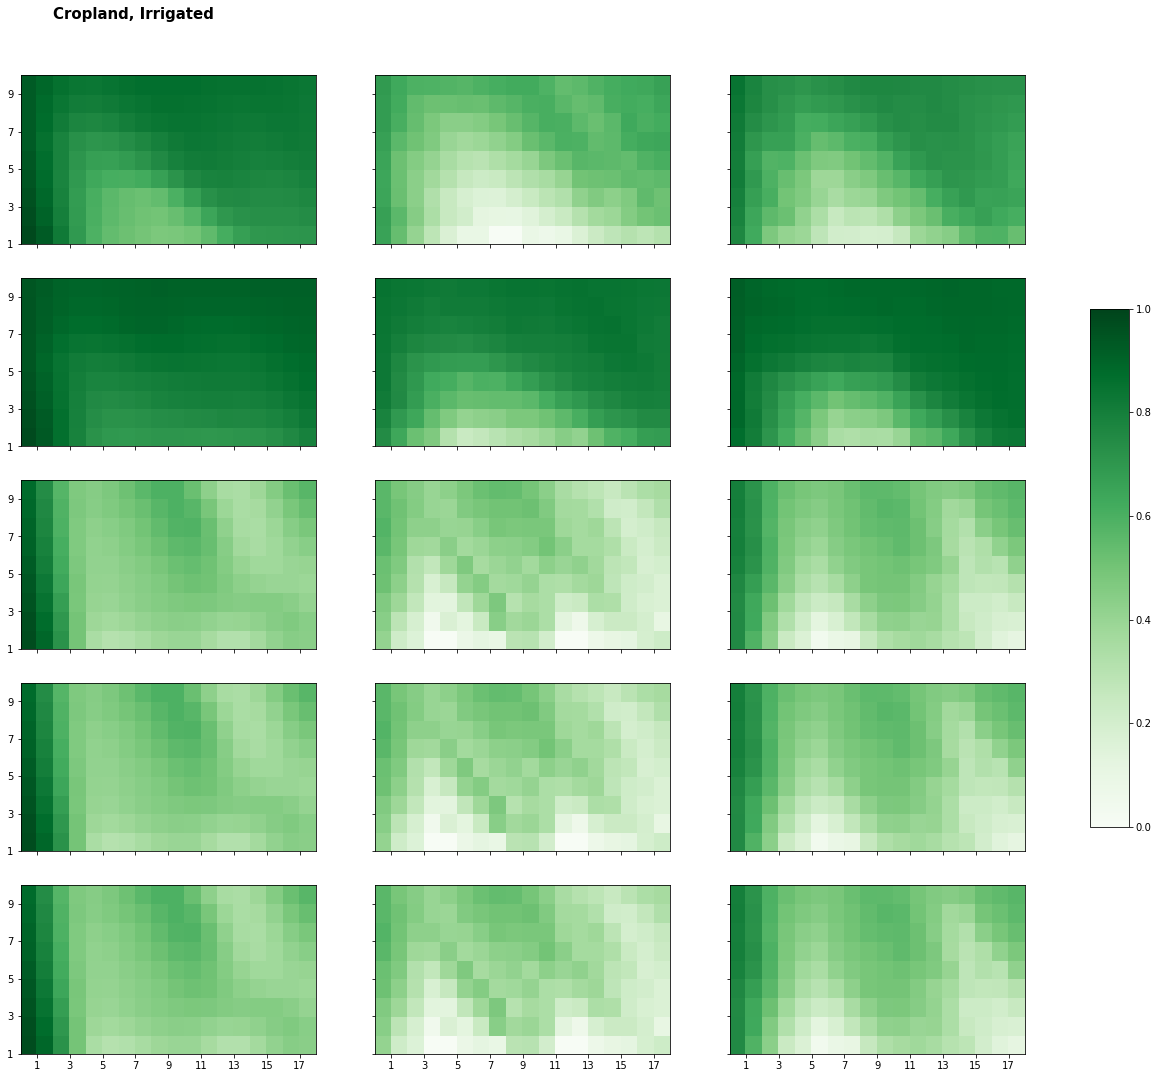

In [95]:
fig, axs = plt.subplots(5, 3, figsize=(18,18), sharex=True, sharey=True)
axs = axs.ravel()
fig = plt.gcf()
var_list = ['NDVI', 'Precip', 'LST']
lc_list = ['Rainfed Croplands', 'Irrigated Croplands', 'Grasslands', 'Shrublands', 'Broadleaf Open Tree Cover']


df_list = [spx_ndvi_crop_irr_rho_df, spx_precip_crop_irr_rho_df, spx_lst_crop_irr_rho_df, 
           spx_ndvi_crop_rain_rho_df, spx_precip_crop_rain_rho_df, spx_lst_crop_rain_rho_df,
           spx_ndvi_grassland_rho_df, spx_precip_grassland_rho_df, spx_lst_grassland_rho_df,
           spx_ndvi_shrubland_rho_df, spx_precip_shrubland_rho_df, spx_lst_shrubland_rho_df,
           spx_ndvi_broadleaf_open_rho_df, spx_precip_broadleaf_open_rho_df, spx_lst_broadleaf_open_rho_df]
           

for i, data in enumerate(df_list):
    xlim = [0,18] #change depending on dekad time period into future of interest
    ylim = [1,10]
    xticks = list(range(1,19, 2)) 
    yticks = list(range(1,11, 2))
    im = axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].pcolor(data, cmap = 'Greens', vmin = 0, vmax  = 1)
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_xticks(xticks)
    axs[i].set_yticks(yticks)
    
axs[0] = axs[0].text(2, 13, 'Cropland, Irrigated', size=15, fontweight='bold')
#axs[0] = axs[0].text(12, 11, 'Cropland, Rainfed', size=15, fontweight='bold')
#     if i<4:
#         axs[i].set_title('NDVI')
#     if 3<i<8:
#         axs[i].set_title('Precipitation')
#     if 7<i<12:
#         axs[i].set_title('Land Surface Temperature')
    
# axs[0].text(0.35, 1.4, 'Croplands', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0].text(1.55, 1.4, 'Grasslands', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0].text(2.75, 1.4, 'Savannas', transform=axs[0].transAxes, size=15, fontweight='bold')
# axs[0].text(1.4, -6.5, 'Prediction Interval', transform=axs[0].transAxes, size=18, fontweight='bold')
# axs[0].text(-0.2, -3.4, 'Embedding Dimension', transform=axs[0].transAxes, size=18, fontweight='bold', rotation = 90)
# axs[9].text(0.9, 2, 'Six-Month Simplex Projection Rho Measure of Error Between Obs vs Pred ', transform=axs[0].transAxes, size=15, fontweight='bold')

cbar_ax = fig.add_axes([0.95, .3, .03, .4])
fig.colorbar(im, cax=cbar_ax)
#plt.savefig('/home/rgreen/simplex_rho_6mo.png', dpi = 500)

# Plot Simplex Error

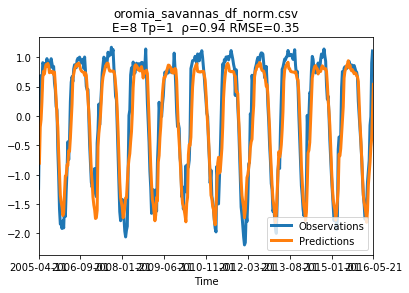

In [333]:
test = Simplex(pathIn = OROMIA_TS_DIR, dataFile = 'oromia_savannas_df_norm.csv', lib = '1 100', pred = '101 500', E = 8, columns = 'SM', target = 'SM', showPlot = True)

In [334]:
test

,Time,Observations,Predictions
0,2005-04-11,-1.233318,NaN
1,2005-04-21,-0.208050,-0.803547
2,2005-05-01,0.684396,-0.188613
3,2005-05-11,0.256602,-0.061069
4,2005-05-21,0.538047,0.239225
...,...,...,...
396,2016-04-11,-0.158415,-0.797413
397,2016-04-21,-0.011371,-0.532825
398,2016-05-01,0.901566,-0.379022
399,2016-05-11,1.106891,0.076776


In [335]:
ComputeError(list(test.Observations), list(test.Predictions))

{'MAE': 0.2614244975440288,
 'RMSE': 0.35493816504457654,
 'rho': 0.9407007557773299}

In [12]:
list(range(100))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]